In [28]:
# importation des modules data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [29]:
# On charge le dataset
df = pd.read_csv('/home/apprenant/simplon_project/house_price/data/df_clean.csv')

## 1. Exploration des données

In [ ]:
df = df['OverallQual','GrLivArea','1stFlrSF','TotalBsmtSF','GarageArea','GarageCars','SalePrice']

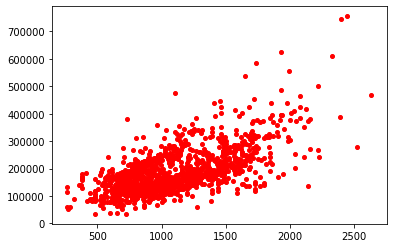

In [57]:
# On affiche le nuage de points dont on dispose
plt.plot( df['TotalBsmtSF'],df['SalePrice'], 'ro', markersize=4)
plt.show()


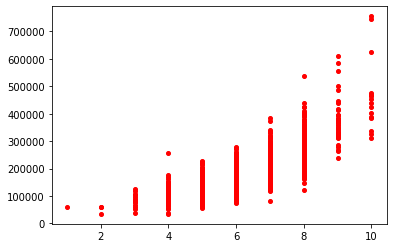

In [52]:
plt.plot(df['OverallQual'], df['SalePrice'], 'ro', markersize=4)
plt.show()


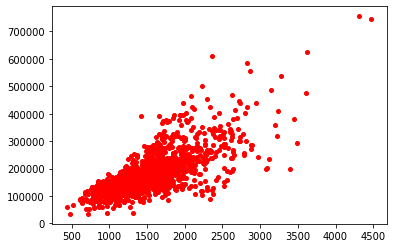

In [54]:
plt.plot(df['GrLivArea'], df['SalePrice'], 'ro', markersize=4)
plt.show()

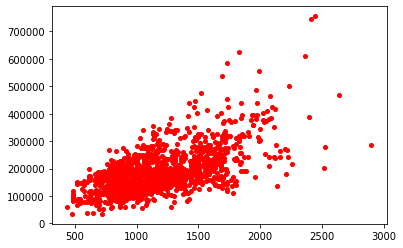

In [56]:
plt.plot(df['1stFlrSF'], df['SalePrice'], 'ro', markersize=4)
plt.show()

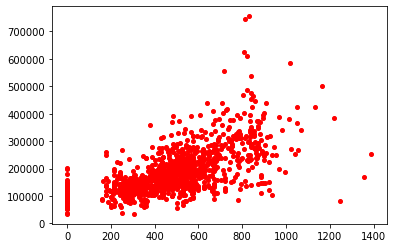

In [58]:
plt.plot(df['GarageArea'], df['SalePrice'], 'ro', markersize=4)
plt.show()

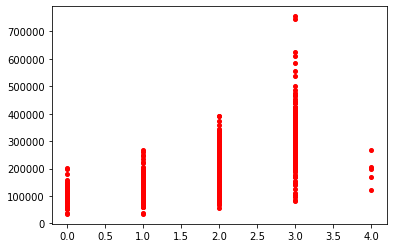

In [59]:
plt.plot(df['GarageCars'], df['SalePrice'], 'ro', markersize=4)
plt.show()

## 2. Choix du modele de machine learning

Clairement, d'après la visualisation, on peut se dire que le prix de la maison dépend de manière lineaire de TotalBsmSF. On peut donc émettre une hypothèse de modélisation qui est que le phénomène possède la forme d'une droite.


## 3. Préparation des données 

### 3a échantillonage

Le jeu de données étant petit il n'est pas nécessaire de réaliser l'apprentissage sur un échantillon

### 3.b Sélection de la variable cible et des variables à explicatives

On peut voir que lorsque TotalBsmSF est proche de zéro ou devient trop frand, les données semblent devenir moins modélisables facilement, il y a plus de variabilité. On va considérer pour l'instant résoudre le problème de prédiction TotalBsmSF supérieur a 300 et inferieur a 3000, afin de conserver une robustesse du modèle à ces données plutôt anormales, qui correspondent peut-être à un autre modèle distinct ou à un traitement comme outliers.


In [60]:
df = df[df['TotalBsmtSF'] <= 3000]
df = df[df['TotalBsmtSF'] >= 200]
df = df[df['SalePrice'] <= 700000]
df = df[df['GarageArea'] <= 1200]
df = df[df['GarageArea'] <= 2500]
df = df[df['OverallQual'] >= 2]

On définit à présent notre variable cible

In [61]:
y = df.SalePrice

In [62]:
X = df[['OverallQual','GrLivArea','1stFlrSF','TotalBsmtSF','GarageArea','GarageCars']]

In [63]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)

In [64]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(xtrain, ytrain)

LinearRegression()

In [65]:
print("Le coefficient β1 est égal à {} tandis que l'intercept β0 est égal à {}"
      .format(round(regr.coef_[0],2),round(regr.intercept_)))
print("On comprend donc que toute maison de base coute {} € auquel il faut ajouter {} € par TotalBsmtSF"
     .format(round(regr.intercept_),round(regr.coef_[0],2)))

Le coefficient β1 est égal à 22806.14 tandis que l'intercept β0 est égal à -111034
On comprend donc que toute maison de base coute -111034 € auquel il faut ajouter 22806.14 € par TotalBsmtSF


In [92]:
x_to_predict = [8, 1600, 1, 550, 1140 , 1320]
x_df =  pd.DataFrame([{ 'OverallQual' : x_to_predict[0],
                       'GrLivArea' : x_to_predict[1],
                       'GarageCars' : x_to_predict[2],
                       'GarageArea' : x_to_predict[3],
                       'TotalBsmtSF': x_to_predict[4],
                       '1stFlrSF': x_to_predict[5],
                     }])
print("Selon le modèle, la maison avec une qualité de {} + une surface vivable de {} + nombre de places du garage {}  + surface du garage de {}+ surface au rez de chaussé de {} + surface 1er etage de {} TotalBsmtSF à une valeur de {} $"
      .format(x_to_predict[0],x_to_predict[1],x_to_predict[2],x_to_predict[3],x_to_predict[4], x_to_predict[5], x_to_predict,round(regr.predict(x_df)[0])))

print('\n')



Selon le modèle, la maison avec une qualité de 8 + une surface vivable de 1600 + nombre de places du garage 1  + surface du garage de 550+ surface au rez de chaussé de 1140 + surface 1er etage de 1320 TotalBsmtSF à une valeur de [8, 1600, 1, 550, 1140, 1320] $




In [88]:
from sklearn.metrics import mean_squared_error, r2_score

In [89]:
ytrainpred = regr.predict(xtrain)
ytestpred = regr.predict(xtest)

print ("Pour les données d'entrainement le R2 vaut {} alors que pour les données de test, il est de {}" 
      .format(round(r2_score(ytrain, ytrainpred),3), round(r2_score(ytest, ytestpred),3)))


Pour les données d'entrainement le R2 vaut 0.797 alors que pour les données de test, il est de 0.836


In [90]:
print ("Pour les données d'entrainement le RMSE vaut {} alors que pour les données de test, il est de {}" 
      .format(round(mean_squared_error(ytrain, ytrainpred, squared=False),3), 
              round(mean_squared_error(ytest, ytestpred, squared=False),3)))

Pour les données d'entrainement le RMSE vaut 34391.765 alors que pour les données de test, il est de 28939.343


#### évaluation graphique

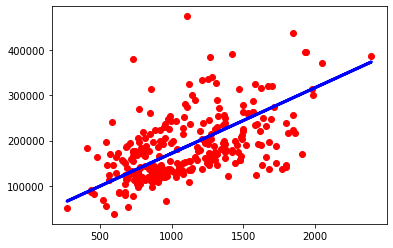

In [44]:
# Plot outputs
plt.scatter(xtest, ytest,  color='red')
plt.plot(xtest, ytestpred, color='blue', linewidth=3)

plt.show()